In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [2]:
t, g = smp.symbols('t g')

Mass of the cart M
m1 m2 are the mass of pendulum 1 & 2
L1 & L2 are the length of pendulum 1 & 2

In [3]:
m1, m2 = smp.symbols('m1 m2')  # m1=thigh mass, m2=shin mass
L1, L2 = smp.symbols('L1 L2')  # L1=thigh length, L2=shin length


Theta 1 & Theta 2 are the angles that the pendulum create with the parallel surface of the cart

In [4]:
theta1, theta2 = smp.symbols(r'\theta_1 \theta_2', cls=smp.Function)
theta1 = theta1(t)
theta2 = theta2(t)

theta1

\theta1(t)

In [5]:
theta1_d = smp.diff(theta1, t)
theta2_d = smp.diff(theta2, t)
theta1_dd = smp.diff(theta1_d, t)
theta2_dd = smp.diff(theta2_d, t)

In [ ]:
x1 = L1/2 * smp.sin(theta1)
y1 = -L1/2 * smp.cos(theta1)

In [ ]:
x2 = x_knee + L2/2 * smp.sin(theta2)
y2 = y_knee - L2/2 * smp.cos(theta2)

In [ ]:
x_knee = L1*smp.sin(theta1)
y_knee = -L1*smp.cos(theta1)

In [ ]:
vx1 = smp.diff(x1, t)
vy1 = smp.diff(y1, t)
vx2 = smp.diff(x2, t)
vy2 = smp.diff(y2, t)

Kinetic Energy

In [7]:
K = 0.5 * m1 * (vx1**2 + vy1**2) + 0.5 * m2 * (vx2**2 + vy2**2)
K

0.5*m1*(L1**2*sin(\theta1(t))**2*Derivative(\theta1(t), t)**2 + L1**2*cos(\theta1(t))**2*Derivative(\theta1(t), t)**2) + 0.5*m2*((L1*sin(\theta1(t))*Derivative(\theta1(t), t) + L2*sin(\theta2(t))*Derivative(\theta2(t), t))**2 + (L1*cos(\theta1(t))*Derivative(\theta1(t), t) + L2*cos(\theta2(t))*Derivative(\theta2(t), t))**2)

In [8]:
P=g*(m1*y1+m2*(y1+y2))
P

g*(L1*m1*cos(\theta1(t)) + m2*(L1*cos(\theta1(t)) + L2*cos(\theta2(t))))

In [9]:
L=K-P
L

-g*(L1*m1*cos(\theta1(t)) + m2*(L1*cos(\theta1(t)) + L2*cos(\theta2(t)))) + 0.5*m1*(L1**2*sin(\theta1(t))**2*Derivative(\theta1(t), t)**2 + L1**2*cos(\theta1(t))**2*Derivative(\theta1(t), t)**2) + 0.5*m2*((L1*sin(\theta1(t))*Derivative(\theta1(t), t) + L2*sin(\theta2(t))*Derivative(\theta2(t), t))**2 + (L1*cos(\theta1(t))*Derivative(\theta1(t), t) + L2*cos(\theta2(t))*Derivative(\theta2(t), t))**2)

In [10]:
LE1 = smp.diff(L, theta1) - smp.diff(smp.diff(L, theta1_d), t).simplify()
LE2 = smp.diff(L, theta2) - smp.diff(smp.diff(L, theta2_d), t).simplify()

In [11]:
sols = smp.solve([LE1, LE2], (theta1_dd, theta2_dd), simplify=False, rational=False)

In [12]:
dz1dt_f = smp.lambdify((t, g, m1, m2, L1, L2, theta1, theta2, theta1_d, theta2_d), 
                        sols[theta1_dd])
dz2dt_f = smp.lambdify((t, g, m1, m2, L1, L2, theta1, theta2, theta1_d, theta2_d), 
                        sols[theta2_dd])
dthe1dt_f = smp.lambdify(theta1_d, theta1_d)
dthe2dt_f = smp.lambdify(theta2_d, theta2_d)



In [13]:
def dSdt(S, t, g, m1, m2, L1, L2):
    """
    Derivative function for ODE solver
    S = [theta1, theta1_dot, theta2, theta2_dot]
    """
    theta1, z1, theta2, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, theta1, theta2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t, g, m1, m2, L1, L2, theta1, theta2, z1, z2),
    ]


In [22]:
t_array = np.linspace(0, 5, 501)  # Shorter time for walking motion
g = 9.81
m1 = 4.0  # Thigh mass (kg)
m2 = 2.0  # Shin mass (kg)
L1 = 0.5  # Thigh length (m)
L2 = 0.5  # Shin length (m)

# Start with leg slightly forward, small velocities
y0 = [0.3, 0.5, 0.5, -0.5]  # Angles in radians, angular velocities



In [15]:
ans = odeint(dSdt, y0=y0, t=t_array, args=(g, m1, m2, L1, L2))


array([[   1.        ,    0.8768271 ,    0.7438199 , ...,  -82.16177821,
         -82.17098498,  -82.13516623],
       [  -3.        ,   -3.17678515,   -3.50995643, ...,   -0.88488675,
           0.36328682,    1.42824788],
       [  -1.        ,   -0.79412356,   -0.56843708, ..., -230.95077317,
        -231.33066493, -231.69085516],
       [   5.        ,    5.33635694,    6.03005542, ...,  -10.0898107 ,
          -9.08360376,   -9.10381467]])

In [16]:
theta1 = ans.T[0]
theta2 = ans.T[2]

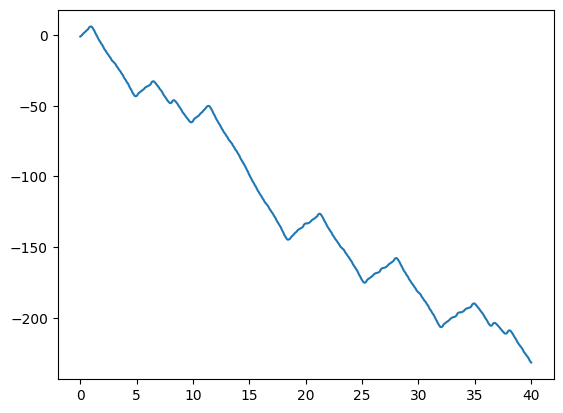

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(t_array, np.degrees(theta1), label='Thigh angle', linewidth=2)
plt.plot(t_array, np.degrees(theta2), label='Shin angle', linewidth=2)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Angle (degrees)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.title('Leg Joint Angles Over Time', fontsize=14)
plt.tight_layout()
plt.show()

In [18]:
# Knee positions for all time steps
x_knee = L1 * np.sin(theta1)
y_knee = -L1 * np.cos(theta1)

# Foot positions for all time steps
x_foot = x_knee + L2 * np.sin(theta2)
y_foot = y_knee - L2 * np.cos(theta2)

NameError: name 'x_knee' is not defined

Error in callback <function _draw_all_if_interactive at 0x7f8ef09efaf0> (for post_execute), with arguments args (),kwargs {}:


NameError: name 'x_knee' is not defined

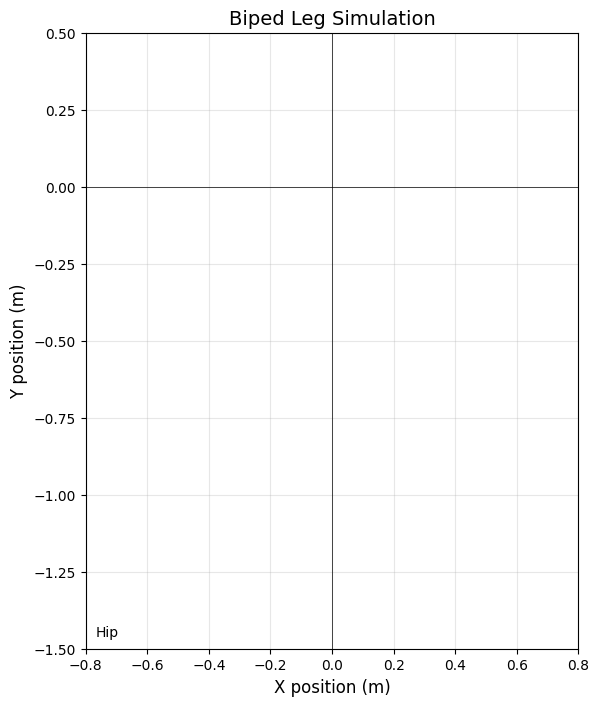

In [24]:
def animate(i):
    """Update function for animation"""
    ln1.set_data([0, x_knee[i], x_foot[i]], [0, y_knee[i], y_foot[i]])

# Set up figure and axis
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('white')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)  # Hip level reference
ax.axvline(x=0, color='k', linewidth=0.5)

# Create the leg line
ln1, = plt.plot([], [], 'ro-', lw=4, markersize=10, markerfacecolor='red', 
                markeredgecolor='darkred', markeredgewidth=2)

# Set axis limits and labels
ax.set_ylim(-1.5, 0.5)
ax.set_xlim(-0.8, 0.8)
ax.set_xlabel('X position (m)', fontsize=12)
ax.set_ylabel('Y position (m)', fontsize=12)
ax.set_title('Biped Leg Simulation', fontsize=14)
ax.set_aspect('equal')

# Add labels for joints
ax.text(0.02, 0.02, 'Hip', fontsize=10, transform=ax.transAxes)

# Create animation
ani = animation.FuncAnimation(fig, animate, frames=len(t_array), interval=50)

# Display in Jupyter
HTML(ani.to_jshtml())